<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/ml-for-finance-intro/blob/main/2025/01-notebooks/nb-lesson-1-3.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Remote Data Access with Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")    

## What is `pandas-datareader`


`pandas-datareader` is an extension to the popular `pandas` library in Python, designed to simplify the process of accessing and importing data from various financial and economic sources. It is particularly useful in data science and finance applications where real-time or historical data is required for analysis.

### Key Features of `pandas-datareader`

1. **Data Acquisition from Multiple Sources**:
   - Fetch financial data such as stock prices, indices, and exchange rates.
   - Access macroeconomic data like GDP, unemployment rates, and inflation.
   - Supported sources include Yahoo Finance, Alpha Vantage, World Bank, and FRED (Federal Reserve Economic Data).

<p></p>

2. **Seamless Integration with `pandas`**:
   - The data retrieved is returned as a `pandas.DataFrame` or `pandas.Series`, enabling immediate compatibility with pandas' analytical tools.
   - Built-in functionality to handle time-series data efficiently.

<p></p>

3. **Ease of Use**:
   - Simple API for fetching data with minimal setup.
   - Provides clear error messages for unsupported sources or connectivity issues.

<p></p>

4. **Customizable Queries**:
   - Retrieve data for specific time periods, tickers, or categories.
   - Filter results based on user-defined criteria.

### Installation

To use `pandas-datareader`, install it via pip:
```bash
pip install pandas-datareader
```

### Core Functions

Here are some of the key functionalities provided by `pandas-datareader`:

In [2]:
from pandas_datareader import data as pdr

1. **Accessing Macroeconomic Data**

Fetch economic indicators such as interest rates or GDP data from FRED. The St. Louis FRED (Federal Reserve Economic Data) is a comprehensive online database managed by the Federal Reserve Bank of St. Louis. It provides free access to a vast collection of economic and financial data that spans across various sectors, geographies, and time periods.

FRED is widely used by economists, researchers, analysts, and students to retrieve historical data for analysis, visualization, and forecasting.

In [3]:
# Example: Retrieve US unemployment rate data
unemployment_data = pdr.get_data_fred('UNRATE', start='2020-01-01', end='2023-01-01')
print(unemployment_data.head())

            UNRATE
DATE              
2020-01-01     3.6
2020-02-01     3.5
2020-03-01     4.4
2020-04-01    14.8
2020-05-01    13.2


2. **World Bank Data**

Retrieve global economic indicators from the World Bank:

In [4]:
# Example: Retrieve World Bank GDP data for a specific country
from pandas_datareader import wb

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country=['US'], start=2010, end=2022)
# Format the GDP with points separating thousands
gdp_data['NY.GDP.MKTP.CD'] = gdp_data['NY.GDP.MKTP.CD'].apply(lambda x: f"{x:,.0f}")
# Print the formatted GDP data
print(gdp_data.head())

                        NY.GDP.MKTP.CD
country       year                    
United States 2022  26,006,893,000,000
              2021  23,681,171,000,000
              2020  21,354,105,000,000
              2019  21,539,982,000,000
              2018  20,656,516,000,000


4. **Google and Alpha Vantage (Deprecated or API Key Required)**

Some sources (like Google Finance) are no longer supported due to service changes. For Alpha Vantage, you need an API key:
```python
# Example with Alpha Vantage
alpha_vantage_data = pdr.av.time_series.AVTimeSeriesReader(symbols='AAPL', api_key='YOUR_API_KEY')
print(alpha_vantage_data.read())
```

### Advantages

1. **Efficient Data Retrieval**:
   - Simplifies the process of obtaining structured financial data.
   - Automates repetitive data-fetching tasks.

2. **Broad Range of Data Sources**:
   - Supports multiple reliable data providers, from economic databases to financial services.

3. **Time-Series Handling**:
   - Data is formatted as `pandas` time-series objects, allowing easy manipulation and plotting.

4. **Customizable Queries**:
   - Specify date ranges, frequency, and fields of interest.


### Common Challenges

1. **API Key Requirements**:
   - Some sources like Alpha Vantage require API keys, which may have rate limits.

2. **Deprecated Sources**:
   - Certain data providers (e.g., Google Finance) are no longer supported.

3. **Connectivity Issues**:
   - Retrieval may fail if the data provider is down or the API service changes.

4. **Data Cleaning**:
   - While the data is structured, some sources may require additional cleaning for specific use cases.

### Alternatives

If `pandas-datareader` doesn’t meet your needs, consider alternatives:
- **`yfinance`**: A more robust tool for Yahoo Finance data.
- **`Quandl`**: High-quality financial, economic, and alternative datasets (requires API key).
- **`alpha_vantage`**: Python library specifically for Alpha Vantage (requires API key).

### Best Practices

1. **Check for Updates**:
   - Ensure you’re using the latest version of `pandas-datareader` as data source APIs frequently change.

2. **Error Handling**:
   - Wrap calls in try-except blocks to handle connectivity or API errors gracefully.
   ```python
   try:
       stock_data = pdr.get_data_yahoo('AAPL', start='2022-01-01', end='2023-01-01')
   except Exception as e:
       print(f"Error fetching data: {e}")
   ```

3. **Use with Larger Pipelines**:
   - Combine `pandas-datareader` with libraries like `numpy` and `matplotlib` for advanced analytics and visualization.

### Some Simple Example with FRED

#### The VIX Index

**What is the VIX Index?**

The **VIX Index**, often referred to as the "Fear Index" or "Fear Gauge," is a financial benchmark that represents the market's expectation of volatility over the next 30 days. It is derived from the prices of options on the **S&P 500 Index (SPX)**. The VIX is widely used as a measure of market sentiment, particularly investor fear or uncertainty.

**Key Features of the VIX Index**

**1. Calculation**

- The VIX is calculated by the Chicago Board Options Exchange (CBOE) using a weighted average of the implied volatilities of a wide range of SPX call and put options.
- It reflects the market's expectations of future price fluctuations, not the actual or historical volatility of the S&P 500.

**2. Volatility as an Asset Class**

- A higher VIX indicates increased market uncertainty and fear, often correlating with significant market downturns or events.
- A lower VIX suggests calm market conditions, indicating lower expected price swings.

**Interpreting VIX Values**

- **Low VIX (<15)**: Suggests stability and investor confidence in the market.
- **Moderate VIX (15–25)**: Indicates average levels of market uncertainty or expected volatility.
- **High VIX (>25)**: Reflects elevated uncertainty, often due to geopolitical events, economic crises, or market shocks.

**Why the VIX Matters**

1. **Market Sentiment Indicator**:
   - The VIX is often used as a barometer for investor sentiment. A rising VIX signals fear and potential risk-off behavior, while a declining VIX suggests confidence.
   
2. **Hedging and Speculation**:
   - Traders and portfolio managers use the VIX for hedging portfolios or speculating on future market volatility via derivatives such as VIX futures, options, or exchange-traded products (ETPs).
   
3. **Leading Indicator**:
   - The VIX can sometimes act as a leading indicator for equity market movements, as spikes in the VIX often precede sharp market declines.

**Practical Applications**

1. **Portfolio Protection**:
   Investors use VIX options or futures to hedge against downside risks in their equity portfolios.
   
2. **Volatility-Based Strategies**:
   Quantitative traders use the VIX in strategies like volatility arbitrage or pairs trading with other volatility instruments.

3. **Economic Analysis**:
   Economists and analysts observe the VIX to gauge market reactions to macroeconomic news, Federal Reserve decisions, or geopolitical developments.

            VIXCLS
DATE              
2023-01-17   19.36
2023-01-18   20.34
2023-01-19   20.52
2023-01-20   19.85
2023-01-23   19.81
Number of nan values in the VIX dataframe: 292
The mean of the dataset = 0.00030844935189630385


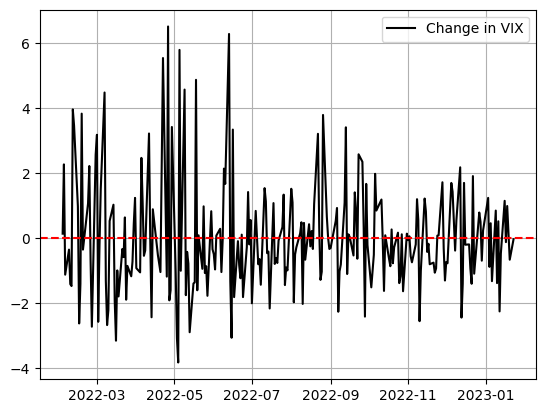

In [5]:
# Setting the beginning and end of the historical data
start_date = '1990-01-01'
end_date   = '2023-01-23'

# Creating a dataframe and downloading the VIX data
vix = pdr.DataReader('VIXCLS', 'fred', start_date, end_date)

# Printing the latest five observations of the dataframe
print(vix.tail())

# Calculating the number of nan values
count_nan = vix['VIXCLS'].isnull().sum()

# Printing the result
print('Number of nan values in the VIX dataframe: ' + str(count_nan))

# Dropping the NaN values from the rows
vix = vix.dropna()

# Taking the differences in an attempt to make the data stationary
vix = vix.diff(periods = 1, axis = 0)

# Dropping the first value of the data frame
vix = vix.iloc[1: , :]

# Calculating the mean of the dataset
mean = vix["VIXCLS"].mean()

# Printing the result
print('The mean of the dataset = ' + str(mean))

# Importing the required library
import matplotlib.pyplot as plt

# Plotting the latest 250 observations in black with a label
plt.plot(vix[-250:], color = 'black', linewidth = 1.5, 
         label = 'Change in VIX')

# Plotting a red dashed horizontal line that is equal to mean
plt.axhline(y = mean, color = 'red', linestyle = 'dashed')

# Calling a grid to facilitate the visual component
plt.grid()

# Calling the legend function so it appears with the chart
plt.legend()

# Calling the plot
plt.show()

#### CPIAUCSL Data in the FRED Database

The CPIAUCSL is a dataset in the FRED (Federal Reserve Economic Data) database representing the Consumer Price Index for All Urban Consumers: All Items, Seasonally Adjusted. It is a key economic indicator published by the Bureau of Labor Statistics (BLS) and provides a measure of the average change in prices paid by urban consumers for a broad basket of goods and services over time. The CPIAUCSL measures inflation by tracking the price changes of goods and services consumed by urban households, which comprise about 93% of the U.S. population.

**Data Characteristics**

- Frequency: Monthly
- Units: Index (1982–1984 = 100) The base period is set to 1982–1984, meaning the average index value during that period is 100.
- Seasonal Adjustment: The data is adjusted for predictable seasonal patterns to provide a clearer picture of underlying trends.

In [6]:
# Setting the beginning and end of the historical data
start_date = '1950-01-01'
end_date   = '2023-01-23'

# Creating a dataframe and downloading the CPI data
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)

# Printing the latest five observations of the dataframe
print(cpi.tail())

            CPIAUCSL
DATE                
2022-09-01   296.341
2022-10-01   297.863
2022-11-01   298.648
2022-12-01   298.812
2023-01-01   300.356


In [7]:
# Checking if there are nan values in the CPI dataframe
count_nan = cpi['CPIAUCSL'].isnull().sum()

# Printing the result
print('Number of nan values in the CPI dataframe: ' + str(count_nan))

Number of nan values in the CPI dataframe: 0


In [8]:
# Transforming the CPI into a year-on-year measure
cpi = cpi.pct_change(periods = 12, axis = 0) * 100

# Dropping the nan values from the rows
cpi = cpi.dropna()

# Resetting the index
cpi = cpi.reset_index()

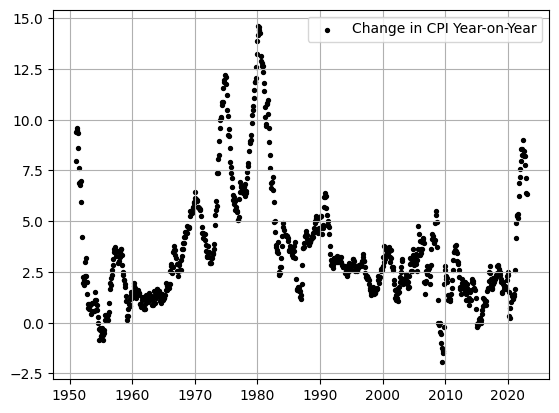

In [9]:
# Creating the chart
fig, ax = plt.subplots()
ax.scatter(cpi['DATE'], cpi['CPIAUCSL'], color = 'black', 
           s = 8,  label = 'Change in CPI Year-on-Year')

# Calling the grid function for better interpretability
plt.grid()

# Calling the legend function to show the labels
plt.legend()

# Showing the plot
plt.show()
plt.close()

Let's make some comparison with the UK using che `GBRCPIALLMINMEI` index. The GBRCPIALLMINMEI dataset in the FRED (Federal Reserve Economic Data) database represents the Consumer Price Index (CPI) for All Items in the United Kingdom, not seasonally adjusted. It is a measure of the average change over time in the prices paid by consumers in the UK for a broad basket of goods and services.

In [10]:
# Setting the beginning and end of the historical data
start_date = '1995-01-01'
end_date   = '2022-12-01'

In [11]:
# Creating a dataframe and downloading the CPI data using its code name and its source
cpi_us = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi_uk = pdr.DataReader('GBRCPIALLMINMEI', 'fred', start_date, end_date)

In [12]:
# Dropping the NaN values from the rows
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.dropna()

In [13]:
# Transforming the CPI into a year-on-year measure
cpi_us = cpi_us.pct_change(periods = 12, axis = 0) * 100
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.pct_change(periods = 12, axis = 0) * 100
cpi_uk = cpi_uk.dropna()

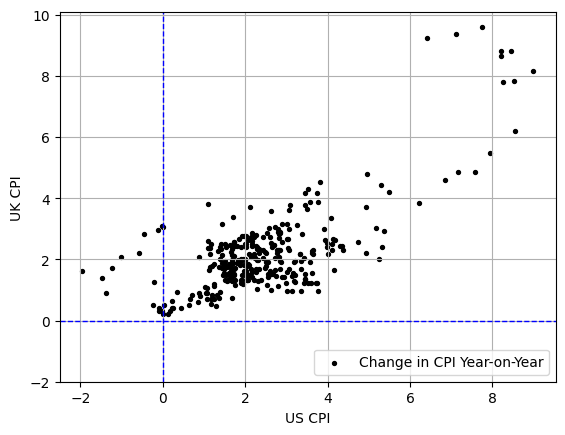

In [14]:
# Creating the chart
fig, ax = plt.subplots()
ax.scatter(cpi_us['CPIAUCSL'], cpi_uk['GBRCPIALLMINMEI'], color = 'black', s = 8, label = 'Change in CPI Year-on-Year')

# Adding a few aesthetic elements to the chart
ax.set_xlabel('US CPI')
ax.set_ylabel('UK CPI')
ax.axvline(x = 0, color='blue', linestyle = 'dashed', linewidth = 1)  # vertical line
ax.axhline(y = 0, color='blue', linestyle = 'dashed', linewidth = 1)  # horizontal line
ax.set_ylim(-2,)

# Calling the grid function for better interpretability
plt.grid()

# Calling the legend function to show the labels
plt.legend()

# Showing the plot
plt.show()
plt.close()


## What are Bars?

In the context of **financial data structures**, the term **BAR** refers to a fundamental unit of time-based price data used primarily in **technical analysis** and charting. A "bar" aggregates market data over a specific period, such as a minute, an hour, a day, or even a week, to represent price movements for that duration. Generally, each bar contains four key price components:

1. **Open Price**: The price at which the first trade occurred during the bar's time period.  
2. **High Price**: The highest price reached during the bar's time period.  
3. **Low Price**: The lowest price reached during the bar's time period.  
4. **Close Price**: The price at which the last trade occurred during the bar's time period.  

Together, these four prices form what is known as an **OHLC** bar (Open-High-Low-Close). Each bar also includes a **volume** component, representing the total quantity of assets traded during that period.

### Visual Representation of a BAR  

- **Body**: A vertical line between the high and low prices indicates the price range for the time period.  
- **Tick marks**:
   - A small horizontal tick to the left represents the **open price**.
   - A small horizontal tick to the right represents the **close price**.

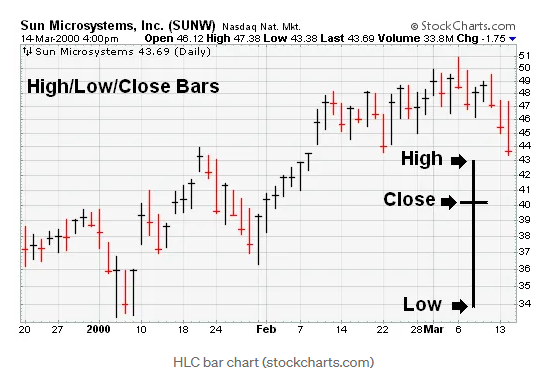

### Applications of BAR in Financial Data Structures

1. **Charting and Visualization**: Bars are used to create bar charts, where each bar shows price movement for a set period. This is useful for visualizing trends over time.  
2. **Technical Indicators**: Bars provide inputs for calculating indicators such as moving averages, Relative Strength Index (RSI), Bollinger Bands, etc.  
3. **Trading Strategies**: Traders analyze bar data to identify patterns like price breakouts, reversals, or continuation patterns.  
4. **Aggregation of Data**: Bars can be aggregated into different timeframes (e.g., 1-minute bars into 15-minute bars, daily bars into weekly bars).  

### Types of Bars  

- **Time-Based Bars**: Aggregated based on fixed time intervals (e.g., 1 minute, 1 hour, 1 day).  
- **Volume-Based Bars**: A new bar is formed after a specified number of units are traded.  
- **Range Bars**: Created when the price moves a specified range (e.g., 10 points).  
- **Tick Bars**: A bar is created after a certain number of trades (e.g., 100 trades).

The **BAR** concept, while simple, is a powerful way to represent market data efficiently and serves as the foundation for most financial data structures used in trading systems and analytics.

## Yahoo! Finance

Yahoo Finance is a widely used platform for accessing financial market data, including stock prices, historical data, and company financials. By using the `yfinance` Python library, we can programmatically access this data and process it with pandas.

**Import Required Libraries**

Begin by importing the necessary libraries:

In [15]:
import yfinance as yf

#### Stock and Index

**Single Ticker**

To download historical data for a single stock. This returns a pandas DataFrame containing open, high, low, close, volume, and adjusted close prices.

In [16]:
# Download historical data for Apple (AAPL)
apple_data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
apple_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796028,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088310,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662712,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320976,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484344,132079200


[*********************100%%**********************]  1 of 1 completed


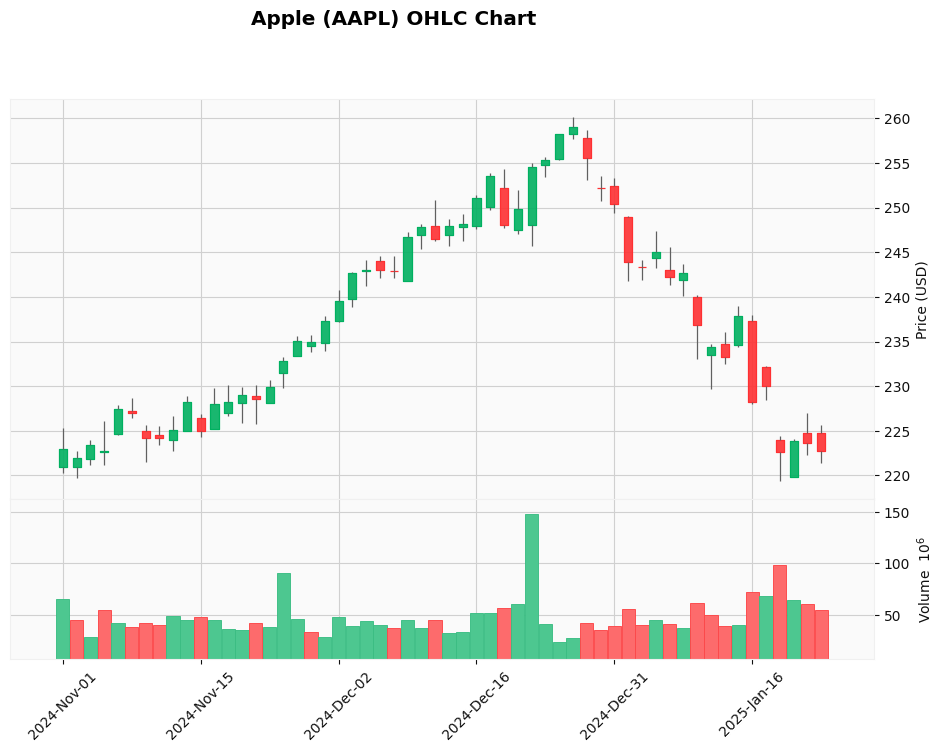

In [17]:
import mplfinance as mpf

# Download historical data for Apple (AAPL)
apple_data = yf.download("AAPL", start="2024-11-01", end="2025-01-27")

# Plot the OHLC chart
mpf.plot(
    apple_data,
    type='candle',  # 'candle' for candlestick chart
    style='yahoo',  # Yahoo Finance style
    title='Apple (AAPL) OHLC Chart',
    ylabel='Price (USD)',
    volume=True,    # Include volume in the plot
    figsize=(12, 8) # Set the size of the plot
)

**Multiple Tickers**

To fetch data for multiple stocks:

In [18]:
tickers = ["AAPL", "MSFT", "GOOGL"]
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")
data.head()

[*********************100%%**********************]  3 of 3 completed


Price       Adj Close                             Close             \
Ticker           AAPL      GOOGL        MSFT       AAPL      GOOGL   
Date                                                                 
2020-01-02  72.796005  68.186821  153.630676  75.087502  68.433998   
2020-01-03  72.088295  67.830101  151.717682  74.357498  68.075996   
2020-01-06  72.662727  69.638054  152.109924  74.949997  69.890503   
2020-01-07  72.320976  69.503548  150.723022  74.597504  69.755501   
2020-01-08  73.484352  69.998253  153.123749  75.797501  70.251999   

Price                        High                               Low  \
Ticker            MSFT       AAPL      GOOGL        MSFT       AAPL   
Date                                                                  
2020-01-02  160.619995  75.150002  68.433998  160.729996  73.797501   
2020-01-03  158.619995  75.144997  68.687500  159.949997  74.125000   
2020-01-06  159.029999  74.989998  69.916000  159.100006  73.187500   
2020-01-07  157.580002  75.224998  70.175003  159.669998  74.370003   
2020-01-08  160.089996  76.110001  70.592499  160.800003  74.290001   

Price                                   Open                         \
Ticker          GOOGL        MSFT       AAPL      GOOGL        MSFT   
Date                                                                  
2020-01-02  67.324501  158.330002  74.059998  67.420502  158.779999   
2020-01-03  67.365997  158.059998  74.287498  67.400002  158.320007   
2020-01-06  67.550003  156.509995  73.447502  67.581497  157.080002   
2020-01-07  69.578003  157.320007  74.959999  70.023003  159.320007   
2020-01-08  69.631500  157.949997  74.290001  69.740997  158.929993   

Price          Volume                      
Ticker           AAPL     GOOGL      MSFT  
Date                                       
2020-01-02  135480400  27278000  22622100  
2020-01-03  146322800  23408000  21116200  
2020-01-06  118387200  46768000  20813700  
2020-01-07  108872000  34330000  21634100  
2020-01-08  132079200  35314000  27746500

This returns a multi-index DataFrame where the first level of the index contains the tickers.

**Closing Prices**

To extract the closing prices for all tickers:

In [19]:
close_prices = data["Close"]
print(close_prices.head())

Ticker           AAPL      GOOGL        MSFT
Date                                        
2020-01-02  75.087502  68.433998  160.619995
2020-01-03  74.357498  68.075996  158.619995
2020-01-06  74.949997  69.890503  159.029999
2020-01-07  74.597504  69.755501  157.580002
2020-01-08  75.797501  70.251999  160.089996


**Calculating Daily Returns**

In [20]:
daily_returns = apple_data["Adj Close"].pct_change()
print(daily_returns.head())

Date
2024-11-01         NaN
2024-11-04   -0.004038
2024-11-05    0.006486
2024-11-06   -0.003267
2024-11-07    0.021372
Name: Adj Close, dtype: float64


**Resampling Data**

Resample the data to a monthly and weekly frequency:

In [21]:
monthly_data = apple_data.resample("M").mean()
print(monthly_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-11-30  226.722501  229.073000  225.626002  227.810499  227.749033   
2024-12-31  248.331430  250.811429  246.873808  249.322856  249.322856   
2025-01-31  235.147332  236.752000  231.821334  234.044667  234.044667   

                  Volume  
Date                      
2024-11-30  4.458203e+07  
2024-12-31  4.656743e+07  
2025-01-31  5.516675e+07  


In [22]:
monthly_data = apple_data.resample("W").mean()
print(monthly_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-11-03  220.970001  225.350006  220.270004  222.910004  222.665024   
2024-11-10  223.440002  225.870001  222.604004  224.523999  224.327133   
2024-11-17  224.995999  226.745996  223.378000  225.359998  225.359998   
2024-11-24  227.445999  230.142001  226.298001  228.738000  228.738000   
2024-12-01  233.517502  235.580002  232.712502  235.047497  235.047497   

                Volume  
Date                    
2024-11-03  65276700.0  
2024-11-10  41616680.0  
2024-11-17  44763540.0  
2024-11-24  39268800.0  
2024-12-01  49529700.0  


**Merging DataFrames**

If you have additional data sources to combine:

In [23]:
other_data = pd.DataFrame({"Date": ["2022-01-03", "2022-01-04"], "Extra": [1, 2]})
other_data["Date"] = pd.to_datetime(other_data["Date"])
other_data.head()

,Date,Extra
0,2022-01-03,1
1,2022-01-04,2


In [24]:
merged_data = pd.merge(apple_data.reset_index(), other_data, how="left", on="Date")
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Extra
0,2024-11-01,220.970001,225.350006,220.270004,222.910004,222.665024,65276700,NaN
1,2024-11-04,220.990005,222.789993,219.710007,222.009995,221.766006,44944500,NaN
2,2024-11-05,221.800003,223.949997,221.139999,223.449997,223.204422,28111300,NaN
3,2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100,NaN
4,2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700,NaN


In [25]:
merged_data_2 = pd.merge(apple_data.reset_index(), daily_returns, how="left", on="Date")
merged_data_2.head()

,Date,Open,High,Low,Close,Adj Close_x,Volume,Adj Close_y
0,2024-11-01,220.970001,225.350006,220.270004,222.910004,222.665024,65276700,NaN
1,2024-11-04,220.990005,222.789993,219.710007,222.009995,221.766006,44944500,-0.004038
2,2024-11-05,221.800003,223.949997,221.139999,223.449997,223.204422,28111300,0.006486
3,2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100,-0.003267
4,2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700,0.021372


In [26]:
merged_data_2 = merged_data_2.rename(columns={'Adj Close_x': 'Adj Close', 'Adj Close_y': 'Daily Returns'})
merged_data_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2024-11-01,220.970001,225.350006,220.270004,222.910004,222.665024,65276700,NaN
1,2024-11-04,220.990005,222.789993,219.710007,222.009995,221.766006,44944500,-0.004038
2,2024-11-05,221.800003,223.949997,221.139999,223.449997,223.204422,28111300,0.006486
3,2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100,-0.003267
4,2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700,0.021372


**Filtering Specific Date Ranges**

In [27]:
filtered_data = merged_data[(merged_data['Date'] >= "2022-01-01") & (merged_data['Date'] <= "2022-01-07")]
filtered_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Extra


**Plotting Closing Prices**

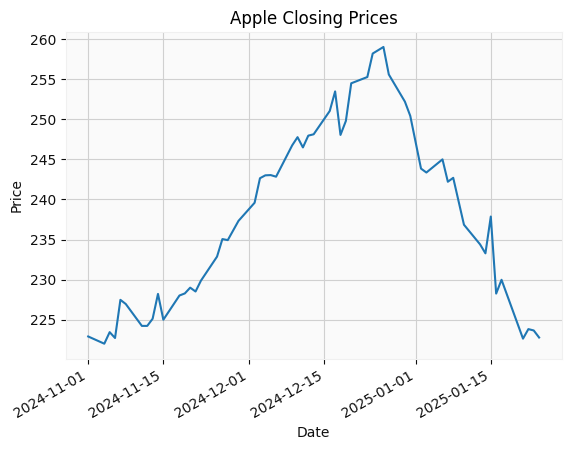

In [28]:
apple_data["Close"].plot(title="Apple Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

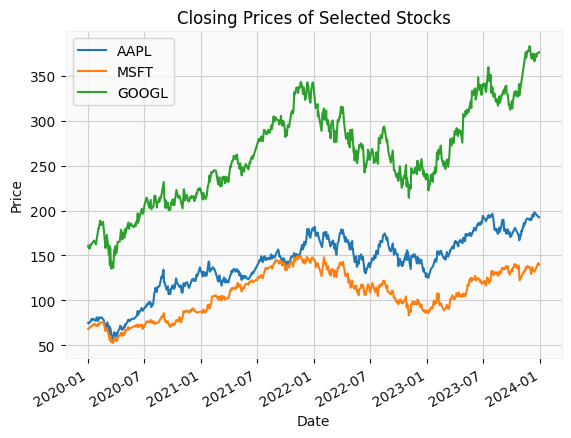

In [29]:
close_prices.plot(title="Closing Prices of Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(tickers)
plt.show()

**Working with Company Financials**

You can also access company financials such as income statements, balance sheets, and cash flows:

In [30]:
apple = yf.Ticker("AAPL")

# Income Statement
#print(apple.financials)

In [31]:
# Balance Sheet
#print(apple.balance_sheet)

In [32]:
# Cash Flow
#print(apple.cashflow)

**Index**

Here are the Yahoo Finance ticker symbols for the some financial indices:

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="text-align: left;">Index Name</th>
      <th style="text-align: left;">Ticker Symbol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left;">NASDAQ 100 - PRICE INDEX</td>
      <td style="text-align: left;">^NDX</td>
    </tr>
    <tr>
      <td style="text-align: left;">NASDAQ COMPOSITE - PRICE INDEX</td>
      <td style="text-align: left;">^IXIC</td>
    </tr>
    <tr>
      <td style="text-align: left;">S&P 500 COMPOSITE - PRICE INDEX</td>
      <td style="text-align: left;">^GSPC</td>
    </tr>
  </tbody>
</table>

          
Please note that Yahoo Finance uses specific ticker symbols for indices, often prefixed with a caret (^). These symbols are case-sensitive and should be entered exactly as shown.

In [33]:
tickers = ["^NDX", "^IXIC", "^GSPC"]
index = yf.download(tickers, start="2014-01-01", end="2022-12-31")
index.head()

[*********************100%%**********************]  3 of 3 completed


Price         Adj Close                                  Close               \
Ticker            ^GSPC        ^IXIC         ^NDX        ^GSPC        ^IXIC   
Date                                                                          
2014-01-02  1831.979980  4143.069824  3563.570068  1831.979980  4143.069824   
2014-01-03  1831.369995  4131.910156  3538.729980  1831.369995  4131.910156   
2014-01-06  1826.770020  4113.680176  3526.959961  1826.770020  4113.680176   
2014-01-07  1837.880005  4153.180176  3557.850098  1837.880005  4153.180176   
2014-01-08  1837.489990  4165.609863  3567.540039  1837.489990  4165.609863   

Price                           High                                    Low  \
Ticker             ^NDX        ^GSPC        ^IXIC         ^NDX        ^GSPC   
Date                                                                          
2014-01-02  3563.570068  1845.859985  4160.959961  3577.030029  1827.739990   
2014-01-03  3538.729980  1838.239990  4152.959961  3567.510010  1829.130005   
2014-01-06  3526.959961  1837.160034  4139.779785  3542.520020  1823.729980   
2014-01-07  3557.850098  1840.099976  4158.180176  3562.989990  1828.709961   
2014-01-08  3567.540039  1840.020020  4171.750000  3575.149902  1831.400024   

Price                                        Open                            \
Ticker            ^IXIC         ^NDX        ^GSPC        ^IXIC         ^NDX   
Date                                                                          
2014-01-02  4131.790039  3553.649902  1845.859985  4160.029785  3575.600098   
2014-01-03  4124.959961  3537.610107  1833.209961  4148.560059  3564.939941   
2014-01-06  4103.750000  3512.449951  1832.310059  4137.029785  3539.020020   
2014-01-07  4126.479980  3535.500000  1828.709961  4128.569824  3539.290039   
2014-01-08  4145.000000  3551.120117  1837.900024  4154.279785  3558.300049   

Price           Volume                          
Ticker           ^GSPC       ^IXIC        ^NDX  
Date                                            
2014-01-02  3080600000  1738820000  1738820000  
2014-01-03  2774270000  1667480000  1667480000  
2014-01-06  3294850000  2292840000  2292840000  
2014-01-07  3511750000  2278220000  2278220000  
2014-01-08  3652140000  2345220000  2345220000

**Save to CSV**

In [34]:
import os

path_name = '.'
file_name = 'index_data.csv'
file_name = os.path.join(path_name, file_name)
index.to_csv(file_name)

print(f"File saved to {file_name}")

File saved to .\index_data.csv


**Other Examples**

Some very simple examples: Stock Price Correlation Analysis and Portfolio Performance

In [35]:
returns = close_prices.pct_change()
correlation = returns.corr()
print(correlation)

Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.691082  0.776784
GOOGL   0.691082  1.000000  0.772333
MSFT    0.776784  0.772333  1.000000


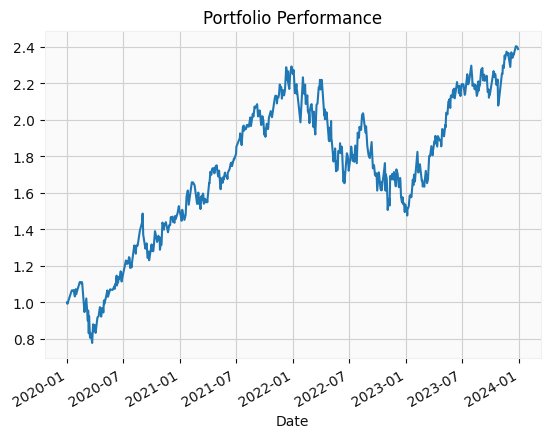

In [36]:
weights = [0.4, 0.4, 0.2]  # Allocation weights for AAPL, MSFT, GOOGL
portfolio_returns = (returns * weights).sum(axis=1)
portfolio_cumulative = (1 + portfolio_returns).cumprod()
portfolio_cumulative.plot(title="Portfolio Performance")
plt.show()

#### Options

Yahoo Finance also provides financial option data, which can be accessed programmatically using the `yfinance` library. Below is a step-by-step guide on how to download and analyze option data from Yahoo Finance.

**Access Option Chains**

Each stock has a set of options available for different expiration dates. You can fetch these option chains using the `Ticker` object in `yfinance`. This will return a list of all available expiration dates for the options.

In [37]:
#
# Fetching Option Expiration Dates
# 
ticker = yf.Ticker("AAPL")  # Replace "AAPL" with your desired stock ticker
expiration_dates = ticker.options
print(expiration_dates)

('2025-01-31', '2025-02-07', '2025-02-14', '2025-02-21', '2025-02-28', '2025-03-07', '2025-03-21', '2025-04-17', '2025-05-16', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-10-17', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-12-18', '2027-01-15')


**Download Option Data for a Specific Expiration Date**

Once you have the expiration dates, you can fetch the options data (both calls and puts) for a specific expiration date. The data for calls and puts will be returned as pandas DataFrames, containing columns such as:

- contractSymbol: The option symbol.
- strike: The strike price.
- lastPrice: The last traded price of the option.
- bid: The bid price.
- ask: The ask price.
- volume: The trading volume.
- openInterest: The number of open contracts.

In [38]:
#
# Fetching Option Chains (Calls and Puts)
#
# Specify the expiration date
expiration_date = expiration_dates[0]  # Example: Use the first available date

# Fetch options data
options_data = ticker.option_chain(expiration_date)

# Separate calls and puts data
calls = options_data.calls
puts = options_data.puts

In [39]:
# Display the data
print("Calls:\n")
calls.head()

Calls:



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250131C00100000,2025-01-21 18:19:27+00:00,100.0,120.36,134.95,136.75,0.0,0.0,10.0,10,0.00001,True,REGULAR,USD
1,AAPL250131C00110000,2025-01-13 16:15:27+00:00,110.0,121.15,124.85,126.45,0.0,0.0,NaN,5,0.00001,True,REGULAR,USD
2,AAPL250131C00115000,2024-12-27 17:07:43+00:00,115.0,138.80,119.90,121.20,0.0,0.0,1.0,1,0.00001,True,REGULAR,USD
3,AAPL250131C00120000,2025-01-24 15:40:27+00:00,120.0,103.10,115.25,116.25,0.0,0.0,35.0,35,0.00001,True,REGULAR,USD
4,AAPL250131C00125000,2024-12-27 16:55:41+00:00,125.0,129.00,109.90,111.35,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD


In [40]:
print("Puts:\n")
puts.head()

Puts:



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250131P00100000,2025-01-27 14:38:03+00:00,100.0,0.01,0.0,0.01,0.0,0.0,2.0,24,2.875003,False,REGULAR,USD
1,AAPL250131P00105000,2025-01-23 17:35:22+00:00,105.0,0.04,0.0,0.01,0.0,0.0,2.0,4,2.750003,False,REGULAR,USD
2,AAPL250131P00110000,2025-01-21 19:08:04+00:00,110.0,0.01,0.0,0.01,0.0,0.0,1.0,3,2.562504,False,REGULAR,USD
3,AAPL250131P00120000,2025-01-24 15:42:18+00:00,120.0,0.01,0.0,0.01,0.0,0.0,2.0,8,2.312504,False,REGULAR,USD
4,AAPL250131P00125000,2025-01-27 14:46:49+00:00,125.0,0.02,0.0,0.01,0.0,0.0,5.0,6,2.187505,False,REGULAR,USD


**Analyze Option Data**

You can process and analyze the data to gain insights.

Example: ***Filter Options Based on Strike Price***

In [41]:
# Filter calls with a strike price greater than 150
filtered_calls = calls[calls['strike'] > 150]
filtered_calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
10,AAPL250131C00155000,2025-01-29 14:41:22+00:00,155.0,80.99,80.25,81.5,-3.209999,-3.812350,2.0,30,0.00001,True,REGULAR,USD
11,AAPL250131C00160000,2025-01-28 15:29:13+00:00,160.0,77.80,75.40,76.1,0.000000,0.000000,1.0,13,0.00001,True,REGULAR,USD
12,AAPL250131C00165000,2025-01-28 15:53:46+00:00,165.0,73.93,70.25,71.3,0.000000,0.000000,2.0,5,0.00001,True,REGULAR,USD
13,AAPL250131C00170000,2025-01-28 18:21:12+00:00,170.0,64.53,65.40,66.5,-4.550003,-6.586571,5.0,22,0.00001,True,REGULAR,USD
14,AAPL250131C00175000,2025-01-28 15:01:54+00:00,175.0,60.15,60.35,61.5,0.000000,0.000000,1.0,81,0.00001,True,REGULAR,USD


Example: ***Sort Options by Open Interest***

In [42]:
# Sort puts by open interest in descending order
sorted_puts = puts.sort_values(by='openInterest', ascending=False)
sorted_puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
28,AAPL250131P00220000,2025-01-29 14:52:35+00:00,220.0,0.65,0.65,0.66,0.14,27.450977,2160.0,19569,0.649906,False,REGULAR,USD
30,AAPL250131P00225000,2025-01-29 14:53:36+00:00,225.0,1.32,1.32,1.34,0.29,28.155348,2299.0,16907,0.637211,False,REGULAR,USD
32,AAPL250131P00230000,2025-01-29 14:53:27+00:00,230.0,2.62,2.64,2.66,0.59,29.064035,3869.0,11700,0.647953,False,REGULAR,USD
34,AAPL250131P00235000,2025-01-29 14:53:35+00:00,235.0,4.59,4.65,4.70,0.89,24.054056,3858.0,11582,0.661624,False,REGULAR,USD
24,AAPL250131P00210000,2025-01-29 14:53:16+00:00,210.0,0.18,0.17,0.18,0.01,5.882356,358.0,11345,0.716800,False,REGULAR,USD


Example: **Merge Calls and Puts**

In [43]:
# Add a column to distinguish between calls and puts
calls['type'] = 'Call'
puts['type'] = 'Put'

# Merge calls and puts
merged_options = pd.concat([calls, puts])
merged_options.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type
0,AAPL250131C00100000,2025-01-21 18:19:27+00:00,100.0,120.36,134.95,136.75,0.0,0.0,10.0,10,0.00001,True,REGULAR,USD,Call
1,AAPL250131C00110000,2025-01-13 16:15:27+00:00,110.0,121.15,124.85,126.45,0.0,0.0,NaN,5,0.00001,True,REGULAR,USD,Call
2,AAPL250131C00115000,2024-12-27 17:07:43+00:00,115.0,138.80,119.90,121.20,0.0,0.0,1.0,1,0.00001,True,REGULAR,USD,Call
3,AAPL250131C00120000,2025-01-24 15:40:27+00:00,120.0,103.10,115.25,116.25,0.0,0.0,35.0,35,0.00001,True,REGULAR,USD,Call
4,AAPL250131C00125000,2024-12-27 16:55:41+00:00,125.0,129.00,109.90,111.35,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD,Call


**Save Option Data to CSV**

You can save the fetched option data to a CSV file for further analysis:

In [44]:
# Save calls and puts to separate CSV files
calls.to_csv("./calls_data.csv", index=False)
puts.to_csv("./puts_data.csv", index=False)

**Automate the Process for All Expiration Dates**

If you want to fetch options data for all expiration dates:

In [45]:
all_calls = []
all_puts = []

for date in expiration_dates:
    options = ticker.option_chain(date)
    calls, puts = options.calls, options.puts
    calls['expirationDate'] = date
    puts['expirationDate'] = date
    all_calls.append(calls)
    all_puts.append(puts)

# Combine all data into single DataFrames
all_calls_data = pd.concat(all_calls)
all_puts_data = pd.concat(all_puts)

# Save to CSV
all_calls_data.to_csv("all_calls_data.csv", index=False)
all_puts_data.to_csv("all_puts_data.csv", index=False)

**Limitations**

`yfinance` does not provide historical options data; you can only access current data for the available expiration dates.

## Reference and Credits